# Primary Contributary Causes of Road Accidents in Chicago

### Overview

In big and burgeoning urban centers, traffic safety is of paramount importance because of its significant impact on human lives and city resources. In a big city like Chicago, its crucial to analyse existing data on road accidents to establish patterns and address the leading contributary causes of road accidents.



By developing multiple models, various stakeholders like the Vehicle Safety Board would be able to determine the main contributary factors to road accidents and implement policies that will increase road safety.



### Problem Statement



This project aims to conduct a thorough analysis of traffic crashes in the city of Chicago, utilizing multiple modeling techniques. The primary goal is to uncover insights into the factors influencing traffic accidents in Chicago, and suggest proactive measures to reduce traffic accidents.





### Stake Holders



This project targets a diverse audience:



- **Vehicle Safety Board**: 



- **City planners and traffic engineers**:  



## Objectives:



1. **Identify the most significant contributing factors to road accidents in Chicago:**

   

2. **Provide insights into patterns and trends to help stakeholders implement targeted interventions to reduce road accidents:**

   

3. **Develop a Model based on metrics that address the predictors for road accidents the best:**

   

## Data Understanding

We've used three datasets from the City of Chicago:



1. **Crashes dataset:** Crashes dataset shows information about each traffic crash on city streets within the City of Chicago limits and under the jurisdiction of Chicago Police Department (CPD).



2. **People dataset:** This dataset contains information about people involved in a crash and if any injuries were sustained. Each record corresponds to an occupant in a vehicle listed in the Crash dataset.



3. **Vehicles dataset:** This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians.






### Exploratory Data Analysis

#### Library Imports

In [356]:
#import files

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE 
from scipy import stats as stats
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from scipy.stats import randint
from xgboost import XGBClassifier

from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

#### 1. Traffic crashes dataset 

##### Load the traffic crashes dataset from City of Chicago.

In [311]:
# Load the data into a dataframe and read the first five rows

crashes_df = pd.read_csv('/kaggle/input/crashes-dataset/Traffic_Crashes_-_Crashes_20241008.csv')

crashes_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",09/05/2023 07:05:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,5500,S,WENTWORTH AVE,225.0,NaN,NaN,NaN,NaN,NaN,NaN,2,INCAPACITATING INJURY,3.0,0.0,1.0,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",09/22/2023 06:50:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,7900,S,CHICAGO SKYWAY OB,411.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"OVER $1,500",07/29/2023 02:45:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,"OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELE...",2101,S,ASHLAND AVE,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,4,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",08/09/2023 11:40:00 PM,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,10020,W,BALMORAL AVE,1650.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/18/2023 12:55:00 PM,FOLLOWING TOO CLOSELY,DISTRACTION - FROM INSIDE VEHICLE,700,W,OHARE ST,1654.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [312]:
# Get the number of rows and columns in the dataset
crashes_df.shape

(880654, 48)

Dataset has 880654 rows and 48 columns

In [313]:
# Lists the columns in crashes dataset
crashes_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

Check the data type held by each column and number of non-null values below

In [314]:
# Lists out column names data types and non-null count for the columns

crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880654 entries, 0 to 880653
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                880654 non-null  object 
 1   CRASH_DATE_EST_I               65255 non-null   object 
 2   CRASH_DATE                     880654 non-null  object 
 3   POSTED_SPEED_LIMIT             880654 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         880654 non-null  object 
 5   DEVICE_CONDITION               880654 non-null  object 
 6   WEATHER_CONDITION              880654 non-null  object 
 7   LIGHTING_CONDITION             880654 non-null  object 
 8   FIRST_CRASH_TYPE               880654 non-null  object 
 9   TRAFFICWAY_TYPE                880654 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      880654 non-null  object 
 12  ROADWAY_SURFACE_COND          

Check percentage of null values in each column of the dataset.

In [315]:
# Function that calculates the percentage of null values in every column and displays the series.

def null_percentages(df):
    
    # Calculate the number of missing values and their percentage
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / df.shape[0]) * 100
    
    # Create a DataFrame with the results
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

    # Filter out columns with no missing values and sort by 'Missing Values'
    missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

    return missing_data


In [316]:
# Check null values in the crashes dataset

null_percentages(crashes_df)

,Missing Values,Percentage
WORKERS_PRESENT_I,879377,99.854994
DOORING_I,877867,99.683531
WORK_ZONE_TYPE,876817,99.564301
WORK_ZONE_I,875687,99.435987
PHOTOS_TAKEN_I,868705,98.643167
STATEMENTS_TAKEN_I,860492,97.710565
NOT_RIGHT_OF_WAY_I,840417,95.431009
CRASH_DATE_EST_I,815399,92.590166
LANE_CNT,681637,77.401227
INTERSECTION_RELATED_I,678655,77.062615


##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [317]:
# Function that drops columns from a DataFrame that have a null value percentage higher than the specified value in optional parameter (threshold).

def drop_highnull_columns(df, threshold=75):
  # Calculate the percentage of null values in each column

  null_percentages = (df.isnull().sum() / len(df)) * 100

  # Identify columns to drop

  columns_to_drop = null_percentages[null_percentages > threshold].index

  # Drop the identified columns
  df = df.drop(columns=columns_to_drop, axis=1)
  return df

In [318]:
# Implement drop_highnull_columns function on the crashes_df dataset

crashes_df_droppedna = drop_highnull_columns(crashes_df)

crashes_df_droppedna.shape

(880654, 38)

The new dataset(crashes_df_dropped) now has 38 columns from the original 48.

In [319]:
# Check the remaining null values in the dataset

null_percentages(crashes_df_droppedna)

,Missing Values,Percentage
HIT_AND_RUN_I,604490,68.641033
REPORT_TYPE,27052,3.071808
LOCATION,6275,0.712539
LONGITUDE,6275,0.712539
LATITUDE,6275,0.712539
MOST_SEVERE_INJURY,1958,0.222335
INJURIES_FATAL,1944,0.220745
INJURIES_TOTAL,1944,0.220745
INJURIES_NO_INDICATION,1944,0.220745
INJURIES_REPORTED_NOT_EVIDENT,1944,0.220745


__Next, Select features/columns that are important and non-repetitive__

In [320]:
# Select the most important features.

crashes_df_dropped = crashes_df_droppedna[['CRASH_RECORD_ID', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 
                                          'ROADWAY_SURFACE_COND', 'ROAD_DEFECT','CRASH_TYPE', 'DAMAGE',
                                           'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR',
                                           'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'TRAFFICWAY_TYPE', 'ALIGNMENT']]

crashes_df_dropped.shape

(880654, 16)

##### Selected features:



* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Vehicles and People datasets. This number also serves as a unique ID in this dataset.

* `ALIGNMENT` Street alignment at crash location, as determined by reporting officer e.g 'STRAIGHT AND LEVEL', 'CURVE ON GRADE', 'CURVE, LEVEL', 'STRAIGHT ON GRADE', 'STRAIGHT ON HILLCREST', 'CURVE ON HILLCREST'

* `WEATHER_CONDITION` Weather condition at time of crash, as determined by reporting officer

* `LIGHTING_CONDITION` Light condition at time of crash, as determined by reporting officer

* `TRAFFICWAY_TYPE` Trafficway type, as determined by reporting officer e.g INTERSECTION', 'RAMP','FOUR WAY', 'DIVIDED - W/MEDIAN (NOT RAISED)', 'UNKNOWN' etc

* `ROADWAY_SURFACE_COND` Road surface condition, as determined by reporting officer

* `ROAD_DEFECT` Road defects, as determined by reporting officer

* `CRASH_TYPE` A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away

* `DAMAGE` - A field observation of estimated value damage.

* `PRIM_CONTRIBUTORY_CAUSE` The factor which was most significant in causing the crash, as determined by officer judgment

* `SEC_CONTRIBUTORY_CAUSE` The factor which was second most significant in causing the crash, as determined by officer judgment

* `CRASH_HOUR` The hour of the day component of CRASH_DATE.

* `CRASH_DAY_OF_WEEK` The day of the week component of CRASH_DATE. Sunday=1

* `CRASH_MONTH` The month of the year component of CRASH_DATE.

* `LONGITUDE` and `LATITUDE` - The crash location, as determined by reporting officer, 

#### 2. Vehicles dataset 

##### Load the traffic crashes dataset from City of Chicago.

In [321]:
vehicles_df = pd. read_csv('/kaggle/input/crashes-dataset/Traffic_Crashes_-_Vehicles_20241008.csv', low_memory=False)

vehicles_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,FIRE_I,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I,TOWED_BY,TOWED_TO,AREA_00_I,AREA_01_I,AREA_02_I,AREA_03_I,AREA_04_I,AREA_05_I,AREA_06_I,AREA_07_I,AREA_08_I,AREA_09_I,AREA_10_I,AREA_11_I,AREA_12_I,AREA_99_I,FIRST_CONTACT_POINT,CMV_ID,USDOT_NO,CCMC_NO,ILCC_NO,COMMERCIAL_SRC,GVWR,CARRIER_NAME,CARRIER_STATE,CARRIER_CITY,HAZMAT_PLACARDS_I,HAZMAT_NAME,UN_NO,HAZMAT_PRESENT_I,HAZMAT_REPORT_I,HAZMAT_REPORT_NO,MCS_REPORT_I,MCS_REPORT_NO,HAZMAT_VIO_CAUSE_CRASH_I,MCS_VIO_CAUSE_CRASH_I,IDOT_PERMIT_NO,WIDE_LOAD_I,TRAILER1_WIDTH,TRAILER2_WIDTH,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,IL,2009.0,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,S,SLOW/STOP IN TRAFFIC,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,IL,2010.0,NONE,PASSENGER,PERSONAL,S,PASSING/OVERTAKING,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,REAR-RIGHT-CORNER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,IL,2015.0,UNKNOWN,PASSENGER,PERSONAL,W,TURNING RIGHT,NaN,NaN,1.0,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,IL,2018.0,UNKNOWN,PASSENGER,PERSONAL,E,STRAIGHT AHEAD,Y,NaN,1.0,NaN,streets and sanitation,pound 6,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,NaN,SIDE-LEFT-FRONT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,OK,2019.0,NONE,PASSENGER,PERSONAL,W,STRAIGHT AHEAD,Y,NaN,1.0,NaN,owner,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,Y,NaN,FRONT-LEFT-CORNER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
# Get the number of rows and columns in the dataset

vehicles_df.shape

(1796451, 71)

Dataset has 1796451 rows and 71 columns

In [323]:
# Lists the columns in vehicles dataset

vehicles_df.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

In [324]:
# Lists out column names data types and non-null count for the columns

vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796451 entries, 0 to 1796450
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

Check percentage of null values in each column of the dataset.

In [325]:
# # Check null values in the vehicles dataset

null_percentages(vehicles_df)

,Missing Values,Percentage
HAZMAT_REPORT_NO,1796450,99.999944
MCS_REPORT_NO,1796444,99.999610
HAZMAT_NAME,1796388,99.996493
TRAILER2_LENGTH,1796381,99.996103
WIDE_LOAD_I,1796290,99.991038
HAZMAT_PLACARDS_I,1796104,99.980684
TRAILER2_WIDTH,1796089,99.979849
UN_NO,1795850,99.966545
IDOT_PERMIT_NO,1795474,99.945615
HAZMAT_CLASS,1795301,99.935985


##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [326]:
# Implement drop_highnull_columns function on the vehicles dataset

vehicles_df_droppedna = drop_highnull_columns(vehicles_df)

vehicles_df_droppedna.shape

(1796451, 18)

The new dataset(vehicles_df_droppedna) now has 18 columns from the original 71 columns.

In [327]:
# Check the remaining null values in the dataset
null_percentages(vehicles_df_droppedna)

,Missing Values,Percentage
AREA_01_I,1314830,73.190418
VEHICLE_YEAR,321383,17.889884
LIC_PLATE_STATE,202511,11.272837
FIRST_CONTACT_POINT,45007,2.505329
MODEL,42014,2.338722
MAKE,41869,2.330651
TRAVEL_DIRECTION,41864,2.330372
VEHICLE_ID,41864,2.330372
VEHICLE_DEFECT,41864,2.330372
VEHICLE_TYPE,41864,2.330372


__Next, Select features/columns that are important and non-repetitive__

In [365]:
# Select the most important features.

vehicles_df_dropped = vehicles_df_droppedna[['CRASH_RECORD_ID', 'UNIT_TYPE', 'MANEUVER',
                                          'VEHICLE_DEFECT', 'VEHICLE_USE','VEHICLE_TYPE']]

vehicles_df_dropped.shape

(1796451, 6)

##### Selected features:



* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Crashes and People datasets. 

* `UNIT_TYPE` Describes the state/type of units involved in the crash(NON-MOTOR VEHICLE, BICYCLE, DRIVERLESS, DRIVER, PARKED)

* `VEHICLE_TYPE` The type of vehicle(Passenger, SUV, Pick-up, Bus)

* `VEHICLE_USE` The normal use of the vehicle(Personal, taxi, Police, School bus etc)

* `VEHICLE_DEFECT` Defects on the car as observed by reporting officer

* `MANEUVER` The action the unit was taking prior to the crash, as determined by the reporting officer

#### 3. People Dataset 

##### Load the People dataset from City of Chicago.

In [329]:
# Load the data into a dataframe and read the first five rows

people_df = pd. read_csv('/kaggle/input/crashes-dataset/Traffic_Crashes_-_People_20241008.csv', low_memory=False)
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,25.0,IL,D,NONE PRESENT,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,37.0,IL,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN,USAGE UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,NaN,NaN,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [330]:
people_df.shape

(1934071, 29)

Dataset has 1934071 rows and 29 columns

In [331]:
# Lists the columns in crashes dataset

people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

Check the data type held by each column and number of non-null values below

In [332]:
# Lists out column names data types and non-null count for the columns

people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934071 entries, 0 to 1934070
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

Check percentage of null values in each column of the dataset.

In [333]:
# Check null values in the people dataset

null_percentages(people_df)

,Missing Values,Percentage
CELL_PHONE_USE,1932911,99.940023
BAC_RESULT VALUE,1931954,99.890542
EMS_RUN_NO,1901577,98.319917
PEDPEDAL_VISIBILITY,1896437,98.054156
PEDPEDAL_ACTION,1896369,98.050640
PEDPEDAL_LOCATION,1896369,98.050640
EMS_AGENCY,1739411,89.935220
HOSPITAL,1618955,83.707113
SEAT_NO,1542674,79.763049
DRIVERS_LICENSE_CLASS,991828,51.281882


##### Data cleaning

First, we'll drop columns with more than 75% of the data missing

In [334]:
# Implement drop_highnull_columns function on the crashes_df dataset

people_df_droppedna = drop_highnull_columns(people_df)

people_df_droppedna.shape

(1934071, 20)

The new dataset(crashes_df_dropped) now has 20 columns from the original 29.

In [335]:
# Check the remaining null values in the dataset

null_percentages(people_df_droppedna)

,Missing Values,Percentage
DRIVERS_LICENSE_CLASS,991828,51.281882
DRIVERS_LICENSE_STATE,802141,41.474227
ZIPCODE,640286,33.105610
AGE,563790,29.150429
CITY,526939,27.245070
STATE,505564,26.139888
DRIVER_VISION,395457,20.446871
DRIVER_ACTION,394865,20.416262
BAC_RESULT,393922,20.367505
PHYSICAL_CONDITION,393809,20.361662


__Next, Select features/columns that are important and non-repetitive__

In [366]:
# Select the most important features.

people_df_dropped = people_df_droppedna[['CRASH_RECORD_ID', 'PERSON_TYPE', 'SEX',
                                         'AGE', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'PERSON_ID', 'DRIVER_VISION']]

people_df_dropped.shape

(1934071, 8)

##### Selected features:



* `CRASH_RECORD_ID` This number can be used to link to the same crash in the Vehicles and People datasets. 

* `PERSON_ID` This number serves as a unique ID in this dataset.

* `PERSON_TYPE` Type of roadway user involved in crash (Driver, passenger, pedestrian, bicycle)

* `SEX` Gender of person involved in crash, as determined by reporting officer

* `INJURY_CLASSIFICATION` Severity of injury person sustained in the crash

* `DRIVER_ACTION` Driver action that contributed to the crash, as determined by reporting officer

* `AGE` Age of person involved in crash

Merging all the data into one dataframe
----------
Since we are focusing on predicting the causes that result to crashes, we will merge on people_df_dropped in the left join with crashes_df_dropped and vehicles_df_dropped also on the left.

In [367]:
# First merge crashes and vehicles dataset together using 'CRASH_RECORD_ID' column

merged_crashes_vehicles = pd.merge(
    crashes_df_dropped,
    vehicles_df_dropped,
    on='CRASH_RECORD_ID',
    how='left',
    suffixes=('_crash', '_vehicles'))  # Add suffix to differentiate columns

In [368]:
# Finally merge the people dataset

final_merged_df = pd.merge(
    merged_crashes_vehicles,
    people_df_dropped,
    on='CRASH_RECORD_ID',
    how='left',
    suffixes=('_merged', '_people'))  # Add suffix for People dataset




In [369]:
final_merged_df.shape

(4065653, 28)

In [370]:
final_merged_df.columns

Index(['CRASH_RECORD_ID', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'UNIT_TYPE', 'MANEUVER',
       'VEHICLE_DEFECT', 'VEHICLE_USE', 'VEHICLE_TYPE', 'PERSON_TYPE', 'SEX',
       'AGE', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'PERSON_ID',
       'DRIVER_VISION'],
      dtype='object')

In [341]:
# Gets the number of rows and columns in the dataset

final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065653 entries, 0 to 4065652
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CRASH_RECORD_ID          object 
 1   WEATHER_CONDITION        object 
 2   LIGHTING_CONDITION       object 
 3   ROADWAY_SURFACE_COND     object 
 4   ROAD_DEFECT              object 
 5   CRASH_TYPE               object 
 6   DAMAGE                   object 
 7   PRIM_CONTRIBUTORY_CAUSE  object 
 8   SEC_CONTRIBUTORY_CAUSE   object 
 9   CRASH_HOUR               int64  
 10  CRASH_DAY_OF_WEEK        int64  
 11  CRASH_MONTH              int64  
 12  LATITUDE                 float64
 13  LONGITUDE                float64
 14  TRAFFICWAY_TYPE          object 
 15  ALIGNMENT                object 
 16  UNIT_TYPE                object 
 17  MANEUVER                 object 
 18  VEHICLE_DEFECT           object 
 19  VEHICLE_USE              object 
 20  VEHICLE_TYPE             object 
 21  PERSON_T

Dataset has 880654 rows and 48 columns

#### Remove row duplicates

__For crash specific details about a traffic crash, I'll use a deduplicated dataframe of the merged dataset. Each row will have information about a unique crash__

In [342]:
# Function that selects unique crashes and person type to driver. 
def select_unique_crashes(df):
    driver_df = df[df['PERSON_TYPE'] == 'DRIVER']
    return driver_df.drop_duplicates(subset = 'CRASH_RECORD_ID')

In [371]:
final_merged_df = select_unique_crashes(final_merged_df)
final_merged_df.shape

(877264, 28)

In [344]:
final_merged_df.duplicated().sum()

0

#### Remove null values

In [373]:
# check null values in the merged dataset
null_percentages(final_merged_df)

,Missing Values,Percentage
AGE,348648,39.742654
VEHICLE_TYPE,9001,1.026031
VEHICLE_DEFECT,9001,1.026031
VEHICLE_USE,9001,1.026031
MANEUVER,9001,1.026031
LATITUDE,6257,0.713240
LONGITUDE,6257,0.713240
UNIT_TYPE,1528,0.174178
SEX,90,0.010259


#### Merged Dataset Cleaning

Remove null values in `AGE` column by replacing null values with an unknown category represented with the value -1

In [374]:
# Change negative and 0 age values to null in the AGE column

final_merged_df.loc[final_merged_df['AGE'] <= 0, 'AGE'] = np.nan

In [375]:
final_merged_df['AGE'].fillna(-1, inplace=True)

In [376]:
# Drop rows with null values in the columns below that are less than one percent of the dataset

final_merged_df.dropna(subset=['SEX','PERSON_TYPE', 'VEHICLE_TYPE', 'VEHICLE_USE', 'VEHICLE_DEFECT', 'LONGITUDE', 'LATITUDE', 'UNIT_TYPE'], inplace=True)

In [377]:
final_merged_df['INJURY_CLASSIFICATION'].value_counts()

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     824508
NONINCAPACITATING INJURY     22248
REPORTED, NOT EVIDENT        10336
INCAPACITATING INJURY         4433
FATAL                          421
Name: count, dtype: int64

In [378]:
final_merged_df['INJURY_CLASSIFICATION'].fillna('UNKNOWN', inplace=True)

In [379]:
null_percentages(final_merged_df)

,Missing Values,Percentage


In [380]:
final_merged_df.shape

(861946, 28)

## DATA ANALYSIS

#### Analysis 1: Identify the most significant contributing factors to road accidents in Chicago:

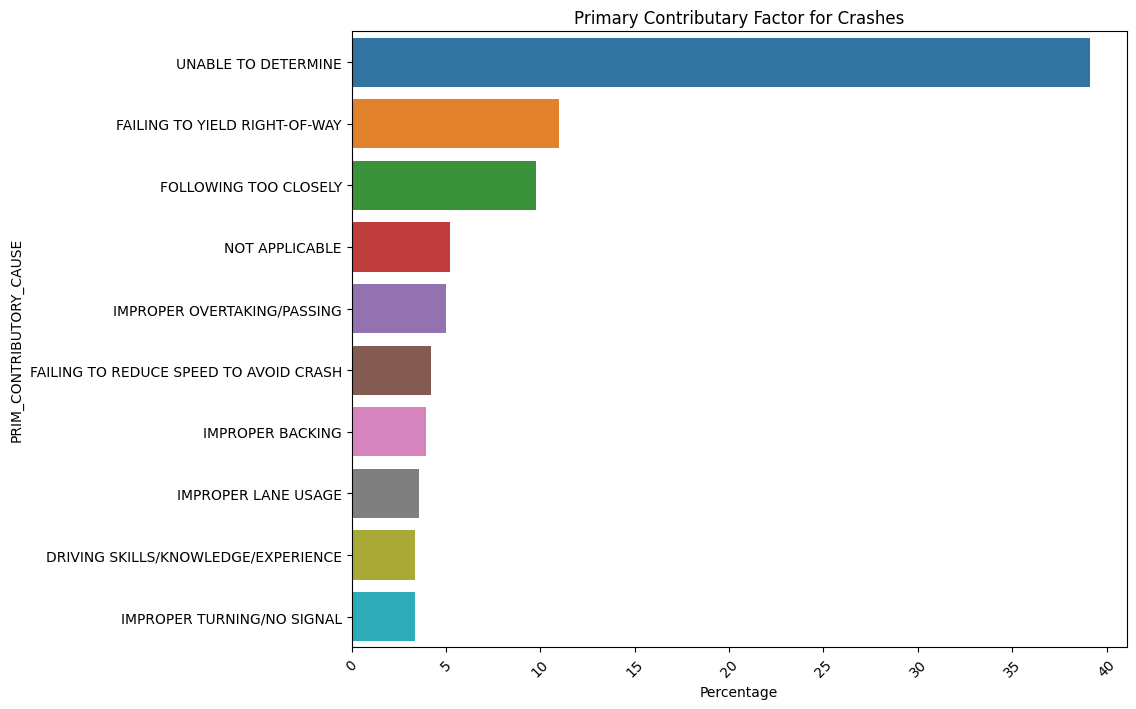

,PRIM_CONTRIBUTORY_CAUSE,count
0,UNABLE TO DETERMINE,39.102566
1,FAILING TO YIELD RIGHT-OF-WAY,10.992800
2,FOLLOWING TOO CLOSELY,9.757108
3,NOT APPLICABLE,5.197657
4,IMPROPER OVERTAKING/PASSING,5.014003
5,FAILING TO REDUCE SPEED TO AVOID CRASH,4.233444
6,IMPROPER BACKING,3.921011
7,IMPROPER LANE USAGE,3.561592
8,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3.388031
9,IMPROPER TURNING/NO SIGNAL,3.377242


In [354]:
# Barplot of primary contributary factors of traffic crashes

top_10_causes = (final_merged_df['PRIM_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)*100).nlargest(10).reset_index()
top_10_causes.columns = ['PRIM_CONTRIBUTORY_CAUSE', 'count']
plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='PRIM_CONTRIBUTORY_CAUSE', orient='h', data=top_10_causes)
plt.title('Primary Contributary Factor for Crashes')
plt.xticks(rotation=45)
plt.xlabel('Percentage')
plt.show()
top_10_causes

**Observation:**

The horizontal barplot above shows the top 10 primary causes of traffic crashes as reported by the officer:

* `39%` of the traffic crashes reported, the reporting officer was unable to determine cause and `5%` of the traffic crashes primary contributary factors were recorded as `NOT APPLICABLE`.

* The chart suggests that in many crash cases, it is difficult to determine a clear contributory factor, hence the need for a model to make predictions on the possible primary cause for an accident.

* Other factors, ranked by decreasing percentage, include:
        "Failing to Yield Right-of-Way"
        "Following Too Closely"
        "Not Applicable"
        "Improper Overtaking/Passing"
        "Failing to Reduce Speed to Avoid Crash"
        "Improper Backing"
        "Improper Lane Usage"
        "Driving Skills/Knowledge/Experience"
        "Improper Turning/No Signal"

* Factors like "Failing to Yield Right-of-Way" and "Following Too Closely" are significant contributors to crashes.

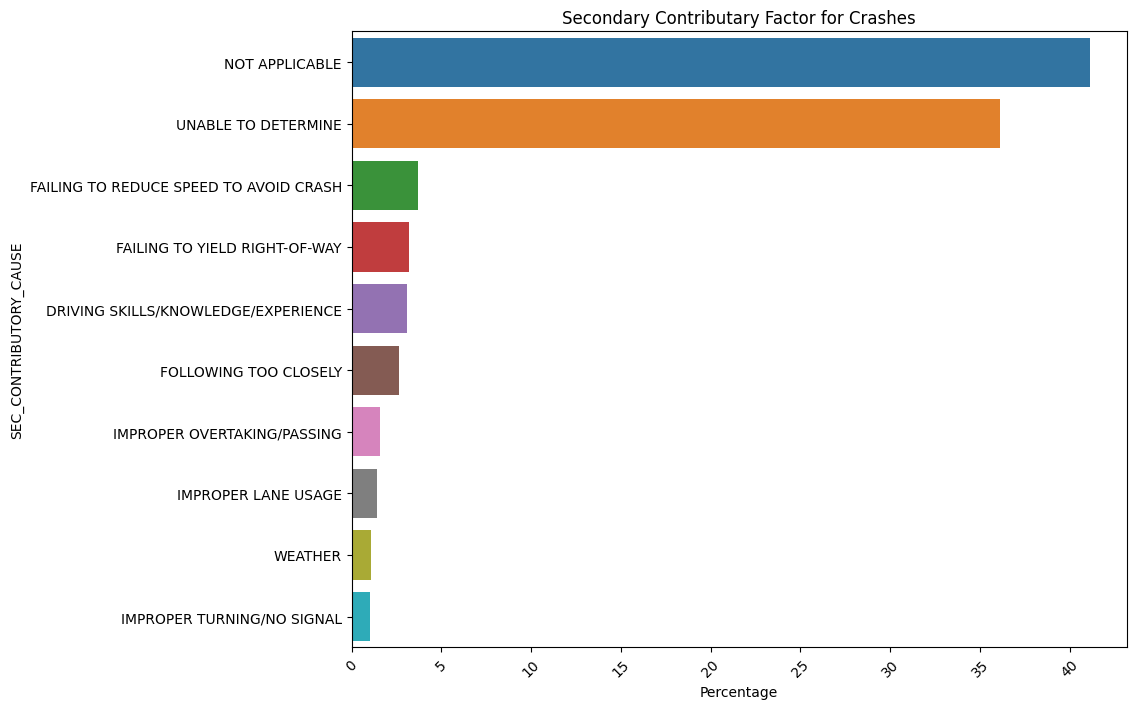

,SEC_CONTRIBUTORY_CAUSE,count
0,NOT APPLICABLE,41.117889
1,UNABLE TO DETERMINE,36.132194
2,FAILING TO REDUCE SPEED TO AVOID CRASH,3.716938
3,FAILING TO YIELD RIGHT-OF-WAY,3.183842
4,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,3.071538
5,FOLLOWING TOO CLOSELY,2.664900
6,IMPROPER OVERTAKING/PASSING,1.560307
7,IMPROPER LANE USAGE,1.411689
8,WEATHER,1.099373
9,IMPROPER TURNING/NO SIGNAL,1.042177


In [355]:
# Barplot of secondary contributary factors of traffic crashes

top_10_causes = (final_merged_df['SEC_CONTRIBUTORY_CAUSE'].value_counts(normalize=True)*100).nlargest(10).reset_index()
top_10_causes.columns = ['SEC_CONTRIBUTORY_CAUSE', 'count']
plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='SEC_CONTRIBUTORY_CAUSE', orient='h', data=top_10_causes)
plt.title('Secondary Contributary Factor for Crashes')
plt.xticks(rotation=45)
plt.xlabel('Percentage')
plt.show()

top_10_causes

**Observation:**

The horizontal barplot above shows the top 10 secondary causes of traffic crashes as reported by the officer:

* `36%` of the traffic crashes reported, the reporting officer was unable to determine cause and `41%` of the traffic crashes primary contributary factors were recorded as `NOT APPLICABLE`.
* Factors like "DRIVING SKILLS/KNOWLEDGE/EXPERIENCE", "FAILING TO YIELD RIGHT-OF-WAY" and "FAILING TO REDUCE SPEED TO AVOID CRASH" are the highest secondary contributors to crashes as reported by the officer, though they're significantly low.

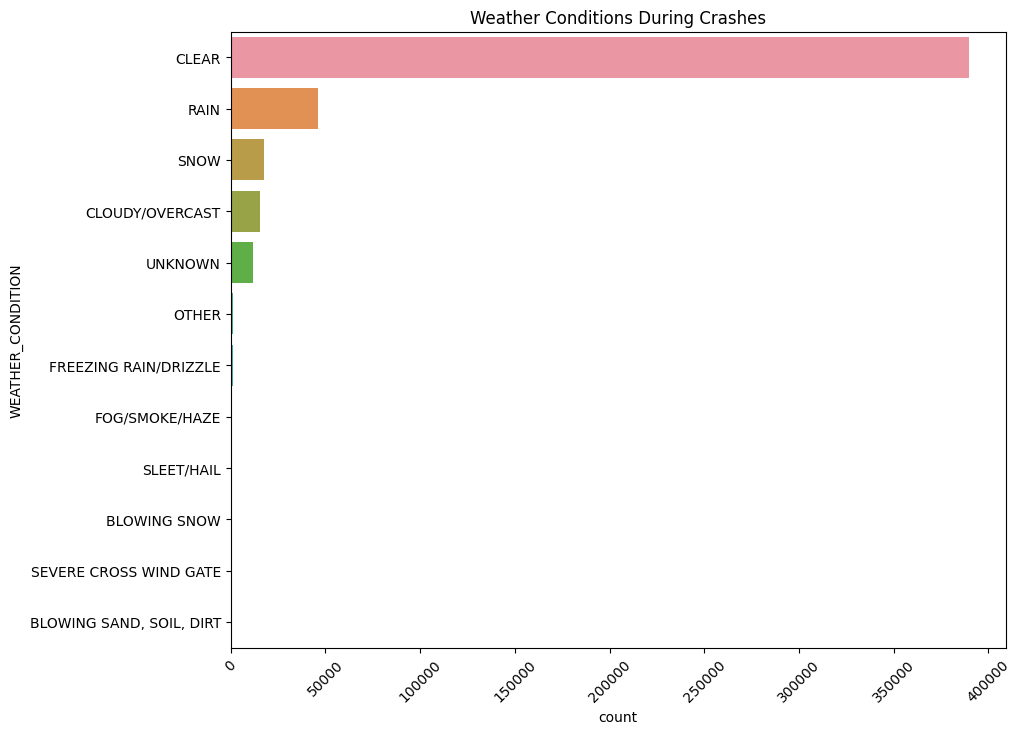

In [357]:
# Barplot of weather conditions

plt.subplots(figsize=(10,8))
sns.barplot(x=deduplicated_df['WEATHER_CONDITION'].value_counts(), y=deduplicated_df['WEATHER_CONDITION'].value_counts().index, orient='h')
plt.title('Weather Conditions During Crashes')
plt.xticks(rotation=45)
plt.show()

Split categorical and numerical columns in the merged dataset.

In [ ]:
deduplicated_df_categorical = final_merged_df.select_dtypes('object')
deduplicated_df_categorical.columns

In [ ]:
for column in [deduplicated_df.select_dtypes('int64').columns]:

        deduplicated_df[column] = deduplicated_df[column].astype('float64')

deduplicated_df_numerical = deduplicated_df.select_dtypes('float64')
deduplicated_df_numerical.columns


In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
for column in deduplicated_df.drop(['AGE', 'PERSON_ID', 'CRASH_RECORD_ID', 'LATITUDE', 'LONGITUDE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'], axis=1).columns:
    print(f"Column: {column}")
    print(deduplicated_df[column].value_counts())
    print("\n")

### DATA PREPARATION FOR MODELLING

In [ ]:
#creating categories of the target variable since it has too many unique values
target_dict = {
    'reckless driving': ['FOLLOWING TOO CLOSELY', 'IMPROPER OVERTAKING/PASSING', 'FAILING TO REDUCE SPEED TO AVOID CRASH',
        'IMPROPER BACKING', 'IMPROPER LANE USAGE','IMPROPER TURNING/NO SIGNAL',
        'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
        'DISTRACTION - FROM INSIDE VEHICLE','DRIVING ON WRONG SIDE/WRONG WAY', 'EXCEEDING AUTHORIZED SPEED LIMIT',
        'EXCEEDING SAFE SPEED FOR CONDITIONS', 'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)',  
        'TEXTING','TURNING RIGHT ON RED', 'CELL PHONE USE OTHER THAN TEXTING'],
    

    'disregarding traffic signs': ['FAILING TO YIELD RIGHT-OF-WAY', 'DISREGARDING TRAFFIC SIGNALS',
         'DISREGARDING STOP SIGN', 'DISREGARDING OTHER TRAFFIC SIGNS', 'DISREGARDING ROAD MARKINGS',
         'DISREGARDING YIELD SIGN'],

    'driver issue': ['DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 'PHYSICAL CONDITION OF DRIVER', 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)'],
    
    'Vehicle fault' : ['EQUIPMENT - VEHICLE CONDITION'],

    'Road Defect' : ['ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 'ROAD CONSTRUCTION/MAINTENANCE'],

    'external factors': ['WEATHER', 'DISTRACTION - FROM OUTSIDE VEHICLE','VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 
        'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST','ANIMAL', 'OBSTRUCTED CROSSWALKS', 'PASSING STOPPED SCHOOL BUS', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT', 'RELATED TO BUS STOP',
             'BICYCLE ADVANCING LEGALLY ON RED LIGHT'],

    'Unknown' : ['UNABLE TO DETERMINE', 'NOT APPLICABLE']
}

In [ ]:
new_target = {value: key for key in target_dict for value in target_dict[key]}

In [ ]:
deduplicated_df['CAUSE'] = deduplicated_df['PRIM_CONTRIBUTORY_CAUSE']
deduplicated_df['CAUSE'] = deduplicated_df['CAUSE'].map(new_target)
deduplicated_df['CAUSE'].value_counts()

In [ ]:
deduplicated_df.drop(deduplicated_df[deduplicated_df['CAUSE'] == 'Unknown'].index, inplace=True)
deduplicated_df['CAUSE'].value_counts()

In [ ]:
#creating categories of the target variable since it has too many unique values
driver_action_dict = {
    "Failure to Follow Traffic Rules": [
        "FAILED TO YIELD",
        "DISREGARDED CONTROL DEVICES",
        "WRONG WAY/SIDE",
        "STOPPED SCHOOL BUS",
        "LICENSE RESTRICTIONS",
        "TOO FAST FOR CONDITIONS",
        "EVADING POLICE VEHICLE"
    ],
    "Inattentive or Distracted Driving": [
        "FOLLOWED TOO CLOSELY",
        "CELL PHONE USE OTHER THAN TEXTING",
        "TEXTING"
        
    ],
    "Improper Maneuvers": [
        "IMPROPER BACKING",
        "IMPROPER TURN",
        "IMPROPER LANE CHANGE",
        "IMPROPER PASSING",
        "OVERCORRECTED"
    ],
    
    "Other": [
        "IMPROPER PARKING",
        "EMERGENCY VEHICLE ON CALL",
        "NONE",
        "UNKNOWN",
        "OTHER"
    ]
}

In [ ]:
driver_action_new = {value: key for key in driver_action_dict for value in driver_action_dict[key]}
# deduplicated_df['CAUSE'] = deduplicated_df['PRIM_CONTRIBUTORY_CAUSE']
deduplicated_df['DRIVER_ACTION'] = deduplicated_df['DRIVER_ACTION'].map(driver_action_new)
deduplicated_df['DRIVER_ACTION'].value_counts()


In [ ]:
Maneuvers_dict = { "Normal Driving": [
        "STRAIGHT AHEAD", 
        "TURNING LEFT", 
        "TURNING RIGHT", 
        "U-TURN", 
        "CHANGING LANES", 
        "NEGOTIATING A CURVE", 
        "TURNING ON RED"
    ],
    "Stopping and Slowing Down": [
        "SLOW/STOP IN TRAFFIC", 
        "SLOW/STOP - LEFT TURN", 
        "SLOW/STOP - RIGHT TURN", 
        "SLOW/STOP - LOAD/UNLOAD"
        
    ],
    "Parking-Related Maneuvers": [
        "BACKING", 
        "ENTERING TRAFFIC LANE FROM PARKING", 
        "LEAVING TRAFFIC LANE TO PARK", 
        "PARKED", 
        "DRIVERLESS", 
        "PARKED IN TRAFFIC LANE",
        "DISABLED"
    ],
    "Avoiding, Skidding, or Control Loss": [
        "SKIDDING/CONTROL LOSS", 
        "AVOIDING VEHICLES/OBJECTS", 
        "DRIVING WRONG WAY", 
        "DIVERGING"
    ],
    "Other and Miscellaneous Maneuvers": [
        "UNKNOWN/NA", 
        "PASSING/OVERTAKING", 
        "OTHER", 
        "ENTER FROM DRIVE/ALLEY", 
        "STARTING IN TRAFFIC", 
        "MERGING"
    ]
}

In [ ]:
Maneuvers_new = {value: key for key in Maneuvers_dict for value in Maneuvers_dict[key]}
# deduplicated_df['CAUSE'] = deduplicated_df['PRIM_CONTRIBUTORY_CAUSE']
deduplicated_df['MANEUVER'] = deduplicated_df['MANEUVER'].map(Maneuvers_new)
deduplicated_df['MANEUVER'].value_counts()


In [ ]:
vehicle_defect_dict = {
    "No Defect or Unknown": [
        "UNKNOWN", 
        "NONE"
    ],
    "Brake and Steering Issues": [
        "BRAKES", 
        "STEERING", 
        "WHEELS", 
        "SUSPENSION"
    ],
    "Tire and Traction Problems": [
        "TIRES", 
        "CARGO"
    ],
    "Mechanical or Engine Issues": [
        "ENGINE/MOTOR", 
        "FUEL SYSTEM", 
        "EXHAUST"
    ],
    "Lights, Windows, and Signals": [
        "WINDOWS", 
        "LIGHTS", 
        "SIGNALS", 
        "RESTRAINT SYSTEM", 
        "TRAILER COUPLING"
    ]
}

In [ ]:
vehicle_defect_new = {value: key for key in vehicle_defect_dict for value in vehicle_defect_dict[key]}
# deduplicated_df['CAUSE'] = deduplicated_df['PRIM_CONTRIBUTORY_CAUSE']
deduplicated_df['VEHICLE_DEFECT'] = deduplicated_df['VEHICLE_DEFECT'].map(vehicle_defect_new)
deduplicated_df['VEHICLE_DEFECT'].value_counts()


In [ ]:
vehicle_type_dict = {
    "Passenger Vehicles": [
        "PASSENGER", 
        "SPORT UTILITY VEHICLE (SUV)", 
        "VAN/MINI-VAN",         
        "AUTOCYCLE"
        
    ],
    "Light Trucks and Pickups": [
        "PICKUP", 
        "TRUCK - SINGLE UNIT", 
        "SINGLE UNIT TRUCK WITH TRAILER", 
        "OTHER VEHICLE WITH TRAILER",
        "TRACTOR W/ SEMI-TRAILER", 
        "TRACTOR W/O SEMI-TRAILER", 
        "FARM EQUIPMENT"
    ],
    "UNKNOWN/NA": [
        "UNKNOWN/NA", 
        "OTHER"
    ],
    "Buses and Passenger Transport": [
        "BUS OVER 15 PASS.", 
        "BUS UP TO 15 PASS."
    ],
    "Motorcycles, Cycles, and Recreational Vehicles": [
        "MOTORCYCLE (OVER 150CC)", 
        "MOPED OR MOTORIZED BICYCLE", 
        "MOTOR DRIVEN CYCLE", 
        "ALL-TERRAIN VEHICLE (ATV)", 
        "3-WHEELED MOTORCYCLE (2 REAR WHEELS)", 
        "RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)", 
        "SNOWMOBILE"
    ]
}

In [ ]:
vehicle_type_new = {value: key for key in vehicle_type_dict for value in vehicle_type_dict[key]}
# deduplicated_df['CAUSE'] = deduplicated_df['PRIM_CONTRIBUTORY_CAUSE']
deduplicated_df['VEHICLE_TYPE'] = deduplicated_df['VEHICLE_TYPE'].map(vehicle_type_new)
deduplicated_df['VEHICLE_TYPE'].value_counts()


In [ ]:
vehicle_use_dict = {
    "Personal and General Use": [
        "PERSONAL", 
        "UNKNOWN/NA", 
        "NOT IN USE", 
         
        "CAMPER/RV - SINGLE UNIT", 
        "CAMPER/RV - TOWED/MULTI-UNIT", 
        "HOUSE TRAILER"
    ],
    "Commercial and Service Vehicles": [
        "COMMERCIAL - SINGLE UNIT", 
        "COMMERCIAL - MULTI-UNIT", 
        "TAXI/FOR HIRE", 
        "RIDESHARE SERVICE", 
        "CONSTRUCTION/MAINTENANCE", 
        "TOW TRUCK", 
        "LAWN CARE/LANDSCAPING"
    ],
    "Public Transit and Government Vehicles": [
        "CTA", 
        "MASS TRANSIT", 
        "SCHOOL BUS", 
        "OTHER TRANSIT", 
        "STATE OWNED"
    ],
    "Emergency and Law Enforcement Vehicles": [
        "POLICE", 
        "FIRE", 
        "AMBULANCE"
    ],
    "Specialized and Other Uses": [
        "MILITARY", 
        "AGRICULTURE", 
        "OTHER",
        "DRIVER EDUCATION"
    ]
}

In [ ]:
vehicle_use_new = {value: key for key in vehicle_use_dict for value in vehicle_use_dict[key]}
# deduplicated_df['CAUSE'] = deduplicated_df['PRIM_CONTRIBUTORY_CAUSE']
deduplicated_df['VEHICLE_USE'] = deduplicated_df['VEHICLE_USE'].map(vehicle_use_new)
deduplicated_df['VEHICLE_USE'].value_counts()


#### TRAIN-TEST SPLIT

In [ ]:
le = LabelEncoder()
# deduplicated_df['CAUSE_encoded'] = encoder.fit_transform(deduplicated_df['CAUSE'])

# print(encoder.inverse_transform(deduplicated_df['CAUSE_encoded']))

# Apply Label Encoding

deduplicated_df['CAUSE_encoded'] = le.fit_transform(deduplicated_df['CAUSE'])


# To get back the original values (inverse_transform)
deduplicated_df['CAUSE_decoded'] = le.inverse_transform(deduplicated_df['CAUSE_encoded'])
print(deduplicated_df['CAUSE_encoded'].value_counts(), deduplicated_df['CAUSE_decoded'].value_counts())

In [ ]:
# Split the data into training and testing data at 80,20 ratio
X = deduplicated_df.drop(['CAUSE_encoded', 'CAUSE_decoded', 'CAUSE', 'PERSON_ID','CRASH_RECORD_ID', 'LATITUDE', 'LONGITUDE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'], axis=1)
y = deduplicated_df['CAUSE_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

### Preprocessing

I've used onehotencoder to convert each categorical value into a new binary column with 0 or 1 for each unique value.

Split categorical and numerical columns in the merged dataset.

In [ ]:
deduplicated_df_categorical = final_merged_df.select_dtypes('object')
deduplicated_df_categorical.columns

In [ ]:
for column in [deduplicated_df.select_dtypes('int64').columns]:

        deduplicated_df[column] = deduplicated_df[column].astype('float64')

deduplicated_df_numerical = deduplicated_df.select_dtypes('float64')
deduplicated_df_numerical.columns


In [ ]:
len(X_train.columns)

In [ ]:
X_train_categorical = X_train.drop(['AGE', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR'], axis=1)
X_test_categorical = X_test.drop(['AGE', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR'], axis=1)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(X_train_categorical)
def oheEncoder(X_categorical):
    # Create new column names with prefixes
    new_column_names = []
    for col, categories in zip(X_categorical.columns, ohe.categories_):
        new_column_names.extend([f"{col}_{category}" for category in categories])

    # Create the DataFrame with the new column names
    X_ohe = pd.DataFrame(
        ohe.transform(X_categorical),
        index=X_categorical.index,
        columns=new_column_names
    )
    return X_ohe
X_train_ohe = oheEncoder(X_train_categorical)
# X_test_ohe = oheEncoder(X_test_categorical)
# X_train_ohe

In [ ]:
X_test_ohe = oheEncoder(X_test_categorical)

In [ ]:
X_train_ohe.head()

### Normalization

In [ ]:
X_train_numeric = X_train[['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'AGE']]
X_test_numeric = X_test[['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'AGE']]
scaler = MinMaxScaler()
scaler.fit(X_train_numeric)
def minmax_scaler(X_numeric):    
    X_scaled = pd.DataFrame(
        scaler.transform(X_numeric),
        # index is important to ensure we can concatenate with other columns
        index=X_numeric.index,
        columns=X_numeric.columns
    )
    return X_scaled
X_train_scaled = minmax_scaler(X_train_numeric)
X_test_scaled = minmax_scaler(X_test_numeric)


In [ ]:
# Join the numeric and categorical features to one dataframe.
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test_full = pd.concat([X_test_scaled, X_test_ohe], axis=1)

### Addressing Class Imbalance

The target classes in the target feature are not evenly distributed as illustrated below.

In [ ]:
# Countplot of churn feature
plt.subplots(figsize=(13,8))
print(deduplicated_df['CAUSE'].value_counts(normalize=True))
sns.countplot(data=deduplicated_df, x='CAUSE')
plt.show()

In [ ]:
smote = SMOTE()
X_train_full.columns = [str(col) for col in X_train_full.columns]
plt.subplots(figsize=(13,8))
y_train.name = 'CAUSE_encoded'
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train)
print(y_train_resampled.value_counts(normalize=True))
sns.countplot(data=y_train_resampled, x=y_train_resampled.index)
plt.show()



## Modelling - White box models
***
### Model 1 : Logistic Regression Classifier - Iteration #1

* Logistic Regression is a type of classification algorithm under supervised machine learning that predicts the probability of a classification outcome based on one or more predictor variables.In this project, the target variable(cause of traffic crash) is a multiclass classification.
* This will serve as the base model.



In [ ]:
# If you want to include samplers in the pipeline, use the imblearn pipeline. Otherwise, use the sklearn one.
LR1_pipe = imbpipe(steps=[
    ('nml', MinMaxScaler()),
    ('ss', OneHotEncoder()),
    ('sm', SMOTE(random_state=42)),
    ('lr', LogisticRegression(fit_intercept=False, solver='liblinear', C=1e12, random_state=42))])
                                   

In [ ]:
# LR1_pipe.fit(X_train_full, y_train)
# y_pred_LR1_pipe = LR1_pipe.predict(X_test_full)
# print(classification_report(y_test, y_pred_LR1_pipe, target_names = ['0','1','2','3','4','5']))

In [ ]:
# Create a LogisticRegression object, fit the data and predict the target variable
log_reg = LogisticRegression(fit_intercept=False, solver='liblinear', C=1e12, random_state=42, class_weight='balanced')
log_reg.fit(X_train_full, y_train)
y_pred_log = log_reg.predict(X_test_full)

#### Model Evaluation

In [ ]:
def show_scores(y_pred, model):
    print('Accuracy score for testing set: ',round(accuracy_score(y_test,y_pred),3))
    # print('F1 score for testing set: ',round(f1_score(y_test,y_pred_log),3))
    # print('Recall score for testing set: ',round(recall_score(y_test,y_pred_log),3))
    # print('Precision score for testing set: ',round(precision_score(y_test,y_pred_log),3))
    cm_lr = confusion_matrix(y_test, y_pred, normalize='true')
    f, ax= plt.subplots(figsize=(7,5))
    sns.heatmap(cm_lr, annot=True, cmap='Blues', xticklabels=np.unique(y_pred_log), yticklabels=np.unique(y_pred))
    ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels') ; ax.set_title(model)
    # ax.xaxis.set_ticklabels(['0', '1']) ; ax.yaxis.set_ticklabels(['0', '1'])
    plt.show();

In [ ]:
print(classification_report(y_test, y_pred_log, target_names = ['0','1','2','3','4','5']))

In [ ]:
show_scores(y_pred_log, "Logistic Regression with weighted class balancing")


#### Observations

* **Accuracy:** The model correctly predicted 66.7% of the instances in the testing set, which is low but okay for the first white box model.
* **F1-score:** The F1-score of 0.76 indicates a good balance between precision and recall. It's lower than the accuracy, suggesting there might be some trade-off between these two metrics.
* **Recall:** The recall of 0.723 is moderate, meaning the model might miss some positive instances. This is a slight decline compared to Decision tree.
* **Precision:** The precision score of 0.802 is significantly improved, but still indicates that the model might incorrectly classify some negative instances as positive.

### Logistic Regression Classifier - Iteration #2

This model uses SMOTE class balancing to address target class imbalance.

In [ ]:
log_reg_smote = LogisticRegression(fit_intercept=False, solver='liblinear', C=1e12, random_state=42)
log_reg_smote.fit(X_train_resampled, y_train_resampled)
y_pred_log_smote = log_reg_smote.predict(X_test_full)

In [ ]:
show_scores(y_pred_log_smote, "Logistic Regression with SMOTE class balancing")

#### Observations

* **Accuracy:** 
* **F1-score:** 
* **Recall:** 
* **Precision:** 

***
### Model 2 : Decision Trees Classifier

* Decision tree classifier is a supervised machine learning algorithm that works by splitting the data into subsets based on the value of input features.
* Each node represents a decision rule, and each branch represents an outcome of that rule.

#### Decision Trees Classifier - Iteration #1 
Base model

In [ ]:
# Create a DecisionTreeClassifier object, fit the data and predict the target variable
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled,y_train_resampled)
y_pred_dt = decision_tree.predict(X_test_full)

#### Model Evaluation

In [ ]:
print(classification_report(y_test, y_pred_dt, target_names=['0','1','2','3','4','5']))

In [ ]:
show_scores(y_pred_dt, "Decision Tree model")

#### Decision Trees Classifier - Iteration #2
##### Hyper-parameter tuning with gridsearchcv

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(dt, param_grid, cv=3)
gs_tree.fit(X_train_resampled, y_train_resampled)

gs_tree.best_params_

In [ ]:
best_params = gs_tree.best_params_
# {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
# dt_best = DecisionTreeClassifier(**best_params)
dt_tuned = DecisionTreeClassifier(**best_params, random_state = 42)
dt_tuned.fit(X_train_resampled,y_train_resampled)
y_pred_dt_tuned = dt_tuned.predict(X_test_full)

In [ ]:
print(classification_report(y_test, y_pred_dt_tuned, target_names=['0','1','2','3','4','5']))

In [ ]:
show_scores(y_pred_dt_tuned, 'Decision Tree Tuned')

#### Feature Importance

In [ ]:
# provides a clear visual representation of the features that contribute most to the DT model's predictions
feature_importance =pd.DataFrame({"Importance": dt_tuned.feature_importances_*100},index = X_train_resampled.columns)
feature_importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "g",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

***
### Model 3 : Random Forest Classifier
* Random forest is a supervised machine learning algorithm that creates a set of decision trees from a randomly selected subset of the training data.
* Random forest is best suited for handling large, complex datasets and providing insight into feature importance.


In [ ]:
# Create a DecisionTreeClassifier object, fit the data and predict the target variable
rf_model = RandomForestClassifier(random_state=42) 
rf_model.fit(X_train_resampled,y_train_resampled) 
y_pred_rf = rf_model.predict(X_test_full)

In [ ]:
show_scores(y_pred_rf, "Random Forest Classifier")

#### Feature Importance

In [ ]:
# provides a clear visual representation of the features that contribute most to the DT model's predictions
feature_importance =pd.DataFrame({"Importance": rf_model.feature_importances_*100},index = X_train_resampled.columns)
feature_importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "g",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

#### Random Forest Classifier - Iteration #2
##### Hyper-parameter tuning with RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': randint(100, 300),        # Number of trees in the forest
    'max_depth': randint(5, 20),               # Maximum depth of the trees
    'min_samples_split': randint(10, 20),       # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': randint(4, 20),        # Minimum number of samples required to be a leaf node
    # 'bootstrap': [True, False],                # Whether bootstrap samples are used when building trees
    # 'criterion': ['gini', 'entropy'],          # Function to measure the quality of a split
    # 'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

# 2. Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# 3. Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
                                   param_distributions=param_dist, 
                                   n_iter=30,  # Number of parameter settings sampled
                                   cv=3,        # 5-fold cross-validation
                                   random_state=42, 
                                   n_jobs=-1,   # Use all available cores
                                   verbose=1)

# 4. Fit RandomizedSearchCV on the training data

X_small, _, y_small, _ = train_test_split(X_train_resampled, y_train_resampled, test_size=0.9, random_state=42)
random_search.fit(X_small, y_small)

# 5. Print the best parameters and the best score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: {:.3f}".format(random_search.best_score_))



In [ ]:
#  access the best model and make predictions
# Best parameters found:  {'max_depth': 19, 'min_samples_split': 12, 'n_estimators': 207}
# Best cross-validation score: 0.685
rf_tuned = random_search.best_estimator_
y_pred_rf_tuned = rf_tuned.predict(X_test_full)

In [ ]:
print(classification_report(y_test, y_pred_rf_tuned, target_names=['0','1','2','3','4','5']))

In [ ]:
show_scores(y_pred_rf_tuned, 'Random Forest Tuned')

#### Feature Importance

In [ ]:
# provides a clear visual representation of the features that contribute most to the DT model's predictions
feature_importance =pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},index = X_train_resampled.columns)
feature_importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "g",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()

***
### Model 4 : XGBoost
* XGBoost is a stand-alone library that implements popular gradient boosting algorithms in the fastest, most performant way possible.  
* There are many under-the-hood optimizations that allow XGBoost to train more quickly than any other library implementations of gradient boosting algorithms.


In [ ]:
# Create a DecisionTreeClassifier object, fit the data and predict the target variable
xgb = XGBClassifier()
xgb.fit(X_train_resampled,y_train_resampled) 
y_pred_xgb = xgb.predict(X_test_full)


In [ ]:
print(classification_report(y_test, y_pred_xgb, target_names=['0','1','2','3','4','5']))

In [ ]:
show_scores(y_pred_xgb, 'XGBoost')

#### Feature Importance

In [ ]:
# provides a clear visual representation of the features that contribute most to the DT model's predictions
feature_importance =pd.DataFrame({"Importance": y_pred_xgb.feature_importances_*100},index = X_train_resampled.columns)
feature_importance.sort_values(by = "Importance", axis = 0, ascending = True).tail(15).plot(kind ="barh", color = "g",figsize=(9, 5))
plt.title("Feature Importance Levels");
plt.show()